In [10]:
from math import sin, cos, pi
from lego_robot import *
import matplotlib.pyplot as plt

##### Computation of new pose and heading.

    The following function takes the old (x, y, heading) pose and the motor ticks (ticks_left, ticks_right) and returns the new (x, y, heading).

In [11]:
from math import sin, cos, pi
from lego_robot import *

def filter_step(old_pose, motor_ticks, ticks_to_mm, robot_width,
                scanner_displacement):

    # Find out if there is a turn at all.
    if motor_ticks[0] == motor_ticks[1]:
        # No turn. Just drive straight.

        x, y, theta = old_pose
        x = x + motor_ticks[0]*cos(theta)*ticks_to_mm
        y = y + motor_ticks[0]*sin(theta)*ticks_to_mm
        return (x, y, theta)

    else:
        x, y, theta = old_pose

        x = x - scanner_displacement*cos(theta)
        y = y - scanner_displacement*sin(theta)
        l, r = motor_ticks
        l = l * ticks_to_mm
        r = r * ticks_to_mm
        # Turn. Compute alpha, R, etc.
        alpha = (r-l)/robot_width
        R = l/alpha
        Rw2 = (R + robot_width/2)
        cx, cy = (x - Rw2*sin(theta),
                  y - Rw2*(-cos(theta)))
        theta = (theta + alpha) % (2*pi)

        x = cx + Rw2*sin(theta)
        y = cy + Rw2*(-cos(theta))


        x = x + scanner_displacement*cos(theta)
        y = y + scanner_displacement*sin(theta)
        return (x, y, theta)


In [12]:
if __name__ == '__main__':
    # Empirically derived distance between scanner and assumed
    # center of robot.
    scanner_displacement = 30.0

    # Empirically derived conversion from ticks to mm.
    ticks_to_mm = 0.349

    # Measured width of the robot (wheel gauge), in mm.
    robot_width = 173.0

    # Measured start position.
    pose = (1850.0, 1897.0, 213.0 / 180.0 * pi)

    # Read data.
    logfile = LegoLogfile()
    logfile.read("Logs/robot4_motors.txt")

    # Loop over all motor tick records generate filtered position list.
    filtered = []
    for ticks in logfile.motor_ticks:
        pose = filter_step(pose, ticks, ticks_to_mm, robot_width,
                           scanner_displacement)
        filtered.append(pose)

    # Write all filtered positions to file.
    f = open("Logs/poses_from_ticks.txt", "w")
    for pose in filtered:
        f.write("F %f %f %f\n" % pose)
    f.close()

##### Plot of the robot's path

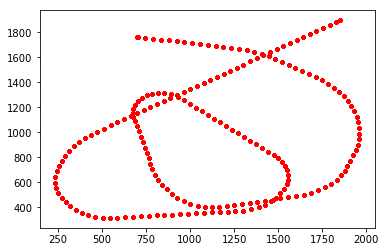

In [13]:
for pose in filtered:
    plt.plot([p[0] for p in filtered], [p[1] for p in filtered], 'r.')
plt.show()